## Learning objectives
- apply the Split-apply-Combine strategy to analyze grouped data.
- use goupby() to split a pandas.DatdaFrame by one or more columns
- Calculate summary stats for groups in a pandas.DataFrame.
- Use method chaining 

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load Palmer penguins data
URL = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
penguins = pd.read_csv(URL)
# Check loaded data
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary statistics
using methods such as
- `sum()`
- `count()`
- `min()` and `max()`
- `mean()` and `median()`
- `std()` and `var()`

### Example

In [3]:
# get the number of non-NA values in each column
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [4]:
# get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### Grouping 

Our penguins data is naturally split into different groups: there are three different species, two sexes, and three islands. Often, we want to calculate a certain statistic for each group. For example, suppose we want to calculate the average flipper length per species. How would we do this “by hand”?

0. We start with our data and notice there are multiple species in the 'species' column
1. We split our original table to group all observations from the same species together. 
2. We calculate the average flipper length for each of the groups we formed. 
3. Then we combine the values for average flipper length per species into a single table. 

This is known as the **Split-Apply-Combine Strategy**. This strategy follows the three steps we explained above: 

1. **Split**: split the data in to logical groups(e.g. species, sex, island, etc)
2. **apply**: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body moss by sex, etc. )
3. **Combine**: combine the stats calculated on each group back together.

For a `pandas.DataFrame` or `pandas.Series`, we can use the `groupby()` method to split the data into different categories. 

The general syntax for `groupby()` is

```python
df.groupby(columns_to_group_by).summary_method()
```

Most often, we will have that `columns_to_group_by` will be a single column name (a string) or a list of column names. The unique values of the column will be used as the groups of the data frame. 

### Example
If we dont't used `groupby()` and directly apply the mean() method to our flipper length column, we obain the average of all the values in the column:

In [5]:
penguins['flipper_length_mm'].mean()

200.91520467836258

To get the mean flipper length by species we 1st group our dataset by te species column's value. Howerver, if we just use the `groupby()`method without specifying what we wish to calculate on each group not much happens up front: 

In [7]:
penguins.groupby('species')['flipper_length_mm']

we get a `GroupBy` object, which is like an intermediate step. It doesn't perform the actual calculations until we specify an operation. 

In [8]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

Let's recap what went on in that line
- start with the `penguins` dataframe, and then...
- use `groupby` to group the dataframe by 'species' values, and then ...
- select the `flipper_length_mm` column, and the
- calculate the `mean()` of this column with respect to the groups

Notice that the name of the series is the same as the column on which we calculated the summary statistic. We can easiliy update this using the `rename()` method: 

In [11]:
# Average flipper length per species
avg_flipper = (penguins.groupby('species')
               .flipper_length_mm
               .mean()
               .rename('mean_flipper_length')
               .sort_values(ascending =False)              
              )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

We can also groupby combinations of columns

Example

We want to know what was the unmber of penguins surveyed in each island on different years. We can use the `count()` method to count the number of non-NA values in each column like this: 

In [12]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

When we groupby island and year we get the count of non-NA values for each column across each combination of island and year:

In [13]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

Let's say we want to plot the surveyed population per year and island. We could then use method chaining to do this:

<AxesSubplot:title={'center':'Penguins surveyed at the Palmer Archipelago'}, ylabel='island,year'>

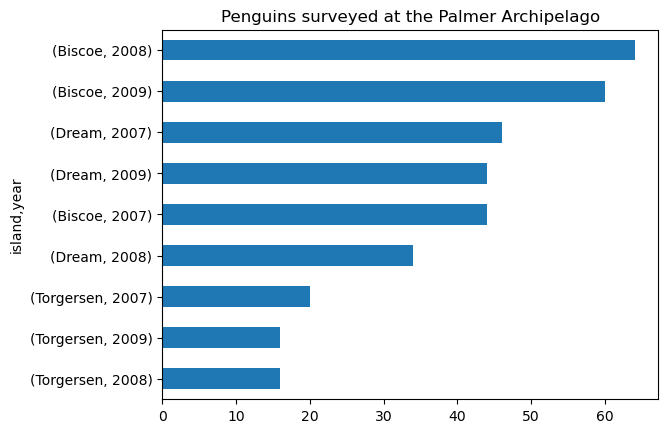

In [15]:
(penguins.groupby(['island','year'])
 .count()
 .species
 .sort_values()
 .plot(kind='barh',
       title='Penguins surveyed at the Palmer Archipelago',
       ylabel=("Island", "Year"))
 )


# Check-in
1. Use the `max()` method for `pandas.DataFrame` to calculate the maximun value of a penguin's body mass by year and species. 
2. Use (1) to display the highest body mass per year and species as a bar plot in descending order. 

In [21]:
# Import numpy and pandas
# Read in data 
# Max body mass per species per year
# penguins.groupby(['species','year'])['body_mass_g'].max()

(penguins.groupby(['species','year'])
        ['body_mass_g']
        .max()
        .rename('max_body_mass_g')
)

species    year
Adelie     2007    4675.0
           2008    4700.0
           2009    4775.0
Chinstrap  2007    4400.0
           2008    4800.0
           2009    4450.0
Gentoo     2007    6300.0
           2008    6000.0
           2009    6000.0
Name: max_body_mass_g, dtype: float64

Text(0.5, 0, 'max_body_mass_g')

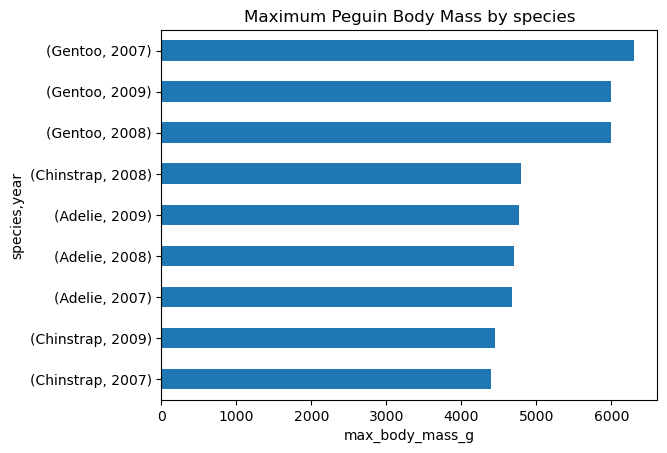

In [19]:
# create plot with descending order
(penguins.groupby(['species','year'])
         .body_mass_g
         .max()
         .sort_values()
         .plot(kind='barh',
             title='Maximum Peguin Body Mass by species',
             ylabel=('species, Year'))
            .set_xlabel(xlabel="max_body_mass_g")
)